###### pip install -U imbalanced-learn

In [2]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install scikeras

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install --upgrade pyodbc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: pyodbc
    Found existing installation: pyodbc 4.0.0-unsupported
    Uninstalling pyodbc-4.0.0-unsupported:
      Successfully uninstalled pyodbc-4.0.0-unsupported
Note: you may need to restart the kernel to use updated packages.


In [49]:
!pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/bc/4f/9a713865151abaac37a5db79bd5eea94186cf3bce85219c71a05c22272b9/shap-0.42.1-cp39-cp39-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 4.8 MB/s eta 0:00:00a 0:00:01


In [206]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
# Set how floating-point errors are handled
np.seterr(divide='ignore', invalid='ignore')

#Import Necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from scipy import stats
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from keras.callbacks import EarlyStopping
from sklearn.cluster import KMeans
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import shap
from keras.models import Model
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve, classification_report, confusion_matrix
from keras.layers import Input, Dense, Dropout
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import PolynomialFeatures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten
from tensorflow.keras.optimizers import Adam

### Review of the Dataset
The dataset comprises a collection of transactions facilitated via credit cards by European cardholders in September 2013. These transactions were recorded over a period of two days, with the dataset encapsulating a total of 284,807 transactions, including 492 identified as fraudulent. Notably, the dataset displays a substantial imbalance, with fraudulent transactions representing a minuscule 0.172% of the total transactions.

Due to confidentiality requirements, the dataset consists only of numerical input variables derived from a Principal Component Analysis (PCA) transformation. Thus, the original features and any additional background information regarding the data are not provided.

The dataset includes the following features:

- Features V1 through V28: These represent the principal components obtained through PCA.

- 'Time': Represents the seconds elapsed between each transaction and the first transaction in the dataset. This feature has not been transformed with PCA.

- 'Amount': Represents the transaction amount. This feature, which also has not been transformed with PCA, can be useful for example-dependant cost-sensitive learning.

The dataset also includes a response variable:

- 'Class': This acts as the response variable. A value of 1 indicates a fraudulent transaction, while a value of 0 signifies a legitimate transaction.

In [76]:
# Read the CSV file into DataFrame
data = pd.read_csv("creditcard.csv")

# Display the first 5 rows of the DataFrame
data.head(5)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
# View the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 

In [39]:
# Checking the shape of the dataset to understand how many observations and features are there
print("\nShape of the dataset:")
print('Dataset shape:', data.shape)


Shape of the dataset:
Dataset shape: (284807, 31)


In [40]:
# Checking the data types and missing values
print("\nData types and missing values:")
print(data.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 n

In [41]:
# Get the summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())


Summary statistics of the dataset:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std   

In [42]:
# Check the balance of the 'Class' variable
print("\nBalance of the 'Class' variable:")
print(data['Class'].value_counts())


Balance of the 'Class' variable:
0    284315
1       492
Name: Class, dtype: int64


In [43]:
print(data.nunique())

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64


###### Distribution of classes

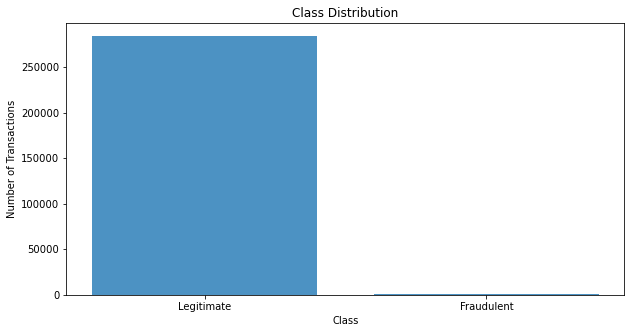

In [45]:
# Check the distribution of classes
class_counts = data['Class'].value_counts()

# Create a bar plot
plt.figure(figsize=(10,5))
plt.bar(class_counts.index, class_counts.values, alpha=0.8, tick_label=['Legitimate', 'Fraudulent'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.show()

This output shows a clear class imbalance in the dataset, with fraudulent transactions making up a very small fraction of the total transactions.

###### Correlation Matrix

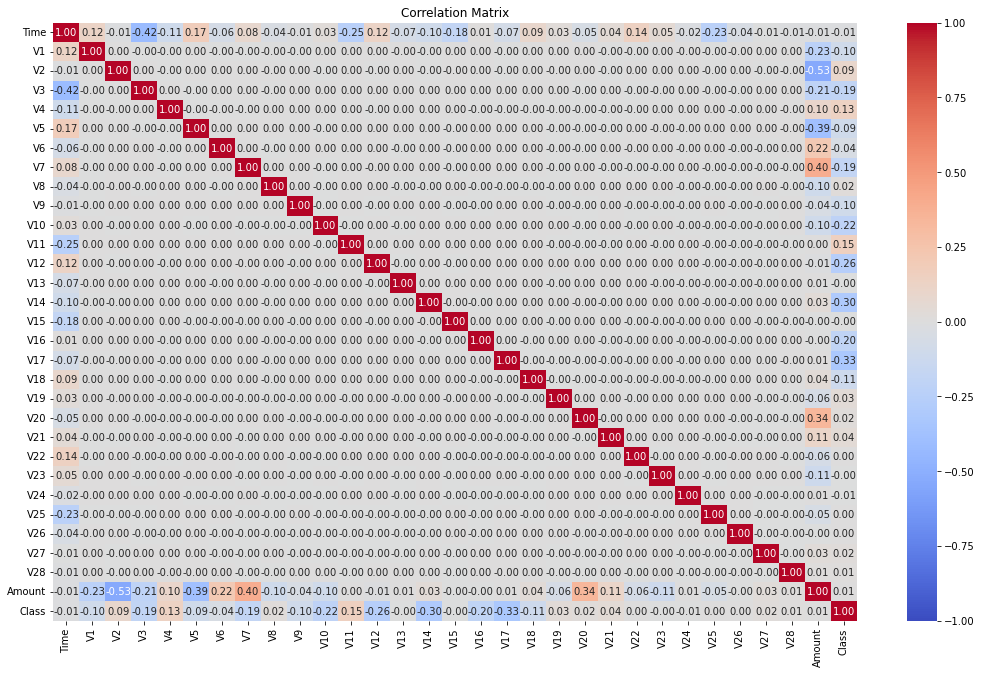

In [46]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(18, 11))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

###### Distribution of transaction Amounts and Times

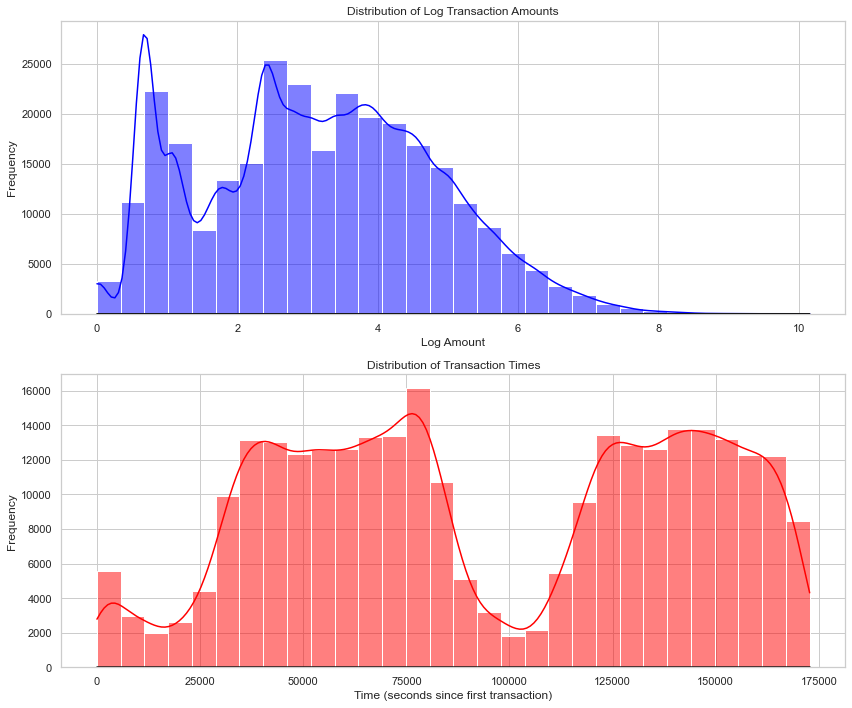

In [104]:
# Apply log transformation to handle skewness in 'Amount'
data['Amount'] = np.log1p(data['Amount'])

# Create a figure with two subplots
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot the distribution of transaction amounts
sns.histplot(data['Amount'], bins=30, ax=ax[0], color='blue', kde=True)
ax[0].set_title('Distribution of Log Transaction Amounts')
ax[0].set_xlabel('Log Amount')
ax[0].set_ylabel('Frequency')

# Generate a normal distribution with the same mean and standard deviation
amount_mean = data['Amount'].mean()
amount_std = data['Amount'].std()
normal_distribution = norm(loc = amount_mean, scale = amount_std)

# Overlay the normal distribution on the histogram
sns.lineplot(x = np.linspace(data['Amount'].min(), data['Amount'].max()), 
             y = normal_distribution.pdf(np.linspace(data['Amount'].min(), data['Amount'].max())), 
             ax=ax[0], color='black')

# Plot the distribution of transaction times
sns.histplot(data['Time'], bins=30, ax=ax[1], color='red', kde=True)
ax[1].set_title('Distribution of Transaction Times')
ax[1].set_xlabel('Time (seconds since first transaction)')
ax[1].set_ylabel('Frequency')

# Generate a normal distribution with the same mean and standard deviation
time_mean = data['Time'].mean()
time_std = data['Time'].std()
normal_distribution = norm(loc = time_mean, scale = time_std)

# Overlay the normal distribution on the histogram
sns.lineplot(x = np.linspace(data['Time'].min(), data['Time'].max()), 
             y = normal_distribution.pdf(np.linspace(data['Time'].min(), data['Time'].max())), 
             ax=ax[1], color='black')

# Adjust the layout for better visualization
plt.tight_layout()

# Show the plots
plt.show()

###### Scatter Plot of Transaction Amount Over Time

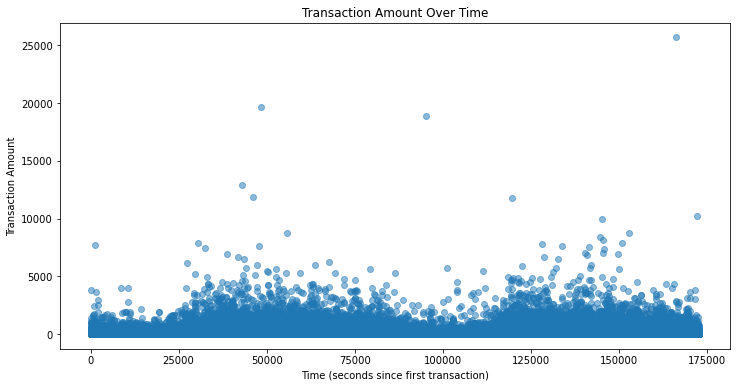

In [48]:
plt.figure(figsize=(12, 6))

# Plotting Time against Amount
plt.scatter(data['Time'], data['Amount'], alpha=0.5)

plt.title('Transaction Amount Over Time')
plt.xlabel('Time (seconds since first transaction)')
plt.ylabel('Transaction Amount')
plt.show()

###### Boxplot of Transaction Amount for Non-Fraudulent and Fraudulent Transactions

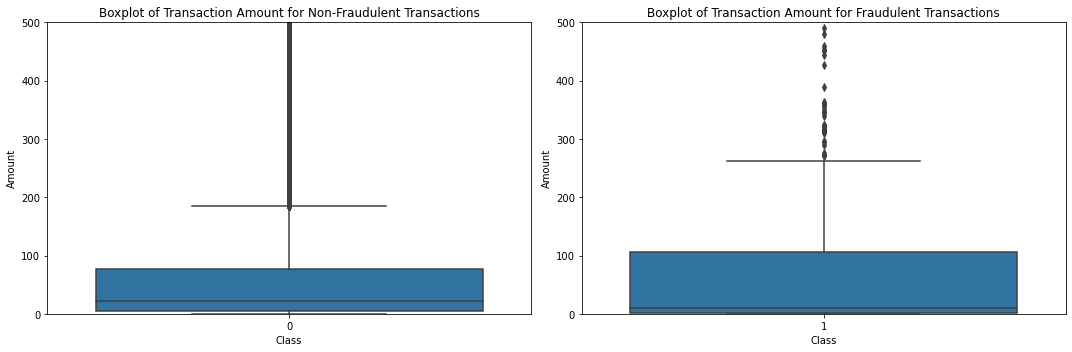

In [8]:
plt.figure(figsize=(15,5))

# Non-Fraudulent Transactions
plt.subplot(1,2,1)
sns.boxplot(data = data[data['Class'] == 0], x = 'Class', y = 'Amount')
plt.title('Boxplot of Transaction Amount for Non-Fraudulent Transactions')
plt.ylim([0, 500])

# Fraudulent Transactions
plt.subplot(1,2,2)
sns.boxplot(data = data[data['Class'] == 1], x = 'Class', y = 'Amount')
plt.title('Boxplot of Transaction Amount for Fraudulent Transactions')
plt.ylim([0, 500])  

plt.tight_layout()
plt.show()

###### Scatter plot of two PCA Components with class separation

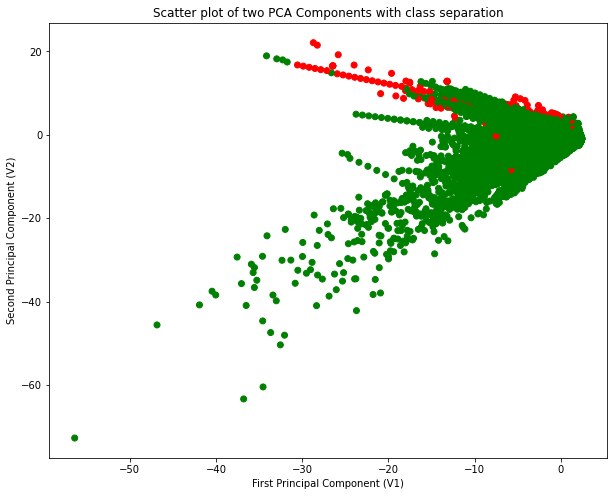

In [21]:
# Define a color map for the classes: Fraudulent - red, Non-Fraudulent - green
colors = np.where(data["Class"]==1, 'red', 'green')

plt.figure(figsize=(10, 8))

# Scatter plot for V1 and V2
plt.scatter(data['V1'], data['V2'], c=colors)

# Set plot labels
plt.xlabel('First Principal Component (V1)')
plt.ylabel('Second Principal Component (V2)')
plt.title('Scatter plot of two PCA Components with class separation')
plt.show()

###### Distribution of new engineered features and its Class

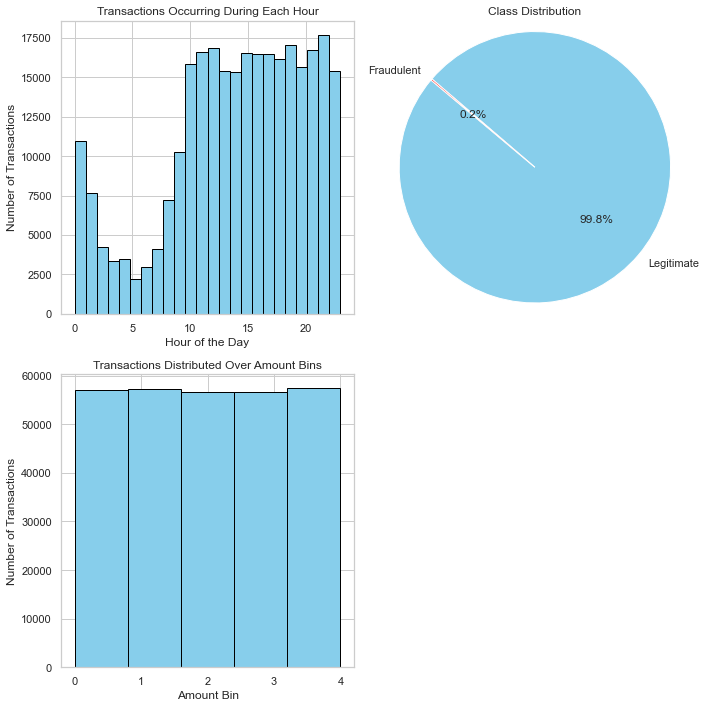

In [103]:
# Create 'Hour' feature
data['Hour'] = data['Time'].apply(lambda x: np.ceil(x / 3600) % 24)

# Discretize 'Amount' feature into categories
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['Amount_Bins'] = discretizer.fit_transform(data['Amount'].values.reshape(-1,1)).astype(int)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Create a 2x2 grid of subplots

# Histogram for 'Hour'
axs[0, 0].hist(data['Hour'], bins=24, color='skyblue', edgecolor='black')
axs[0, 0].set_xlabel('Hour of the Day')
axs[0, 0].set_ylabel('Number of Transactions')
axs[0, 0].set_title('Transactions Occurring During Each Hour')

# Histogram for 'Amount_Bins'
axs[1, 0].hist(data['Amount_Bins'], bins=5, color='skyblue', edgecolor='black')
axs[1, 0].set_xlabel('Amount Bin')
axs[1, 0].set_ylabel('Number of Transactions')
axs[1, 0].set_title('Transactions Distributed Over Amount Bins')

# Pie chart for 'Class' imbalance
counts = data['Class'].value_counts()
labels = ['Legitimate', 'Fraudulent'] if 0 in counts.index else ['Fraudulent', 'Legitimate']
colors = ['skyblue', 'red']

axs[0, 1].pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
axs[0, 1].axis('equal')  
axs[0, 1].set_title('Class Distribution')

# Hide unused subplot
fig.delaxes(axs[1, 1])

plt.tight_layout()  
plt.show()

###### Resampling

In [77]:
# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

###### Class Distribution After Resampling

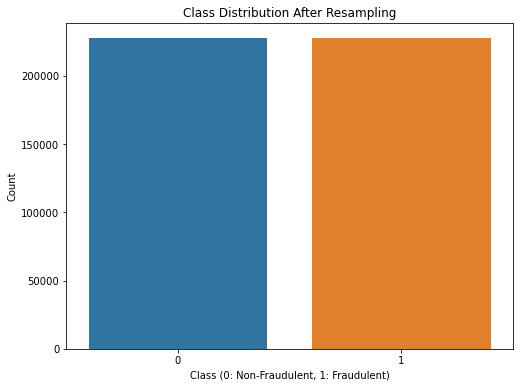

In [78]:
# Convert y_train_res to a DataFrame for concatenation
y_train_res_df = pd.DataFrame(y_train_res, columns=['Class'])

# Combine resampled features and target into one DataFrame for visualization
resampled_data = pd.concat([X_train_res, y_train_res_df], axis=1)

# Create a bar plot for the 'Class' column in the resampled_data
plt.figure(figsize=(8, 6))
sns.countplot(data=resampled_data, x='Class')
plt.title('Class Distribution After Resampling')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.show()

## Model 1 - Logistic Regression

Best parameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation score: 0.948019571164186
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



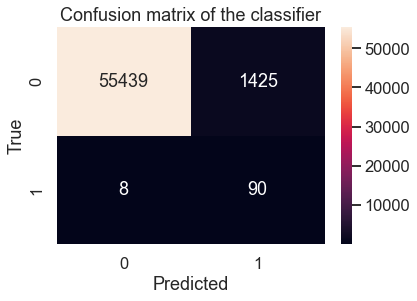

In [162]:
# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define the hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Initialize the grid search
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)

# Fit the model with grid search
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Print the best score
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

 ###### Model Interpretability and Identification of Predictive Factors

In [163]:
# Display feature importance for the best logistic regression model
importance = best_model.coef_[0]
feature_names = data.drop('Class', axis=1).columns

# Print each feature with its corresponding importance
for i,j in enumerate(importance):
    print(f"Feature {feature_names[i]}: {j}")


Feature Time: -0.8294555115002884
Feature V1: 1.2607490858984505
Feature V2: -0.7473064537859219
Feature V3: -0.09332547699717968
Feature V4: 1.6511444026724005
Feature V5: 0.47947556325983004
Feature V6: -0.2273119886860405
Feature V7: 0.14531175872712815
Feature V8: -0.8720167536201766
Feature V9: -0.8606689486263552
Feature V10: -1.7404527206597553
Feature V11: 0.5080635044436651
Feature V12: -1.3590969941497488
Feature V13: -0.12023922975460995
Feature V14: -1.4944627582701036
Feature V15: -0.2064700623364878
Feature V16: -0.6659163259906397
Feature V17: -0.8847919981197263
Feature V18: -0.2726960793661218
Feature V19: 0.23406029509763235
Feature V20: -0.37589631550187463
Feature V21: 0.30029325828839104
Feature V22: 0.46294412486564573
Feature V23: -0.10493222911117296
Feature V24: -0.11238515879869164
Feature V25: -0.22120449755135432
Feature V26: -0.3665642623867047
Feature V27: 0.03634518462341069
Feature V28: 0.16019917987109766
Feature Amount: -0.07994161828003024
Feature Hou

#### Enhanced Logistic Regression for Credit Card Fraud Detection with Clustering-Based Feature Engineering

Best parameters: {'C': 10, 'penalty': 'l2'}
Best cross-validation score: 0.9458608662948136
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



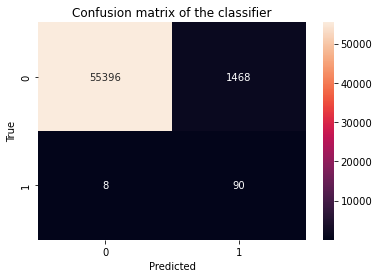

In [35]:
# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Create 'Hour' feature
X['Hour'] = X['Time'].apply(lambda x: np.ceil(x / 3600) % 24)

# Discretize 'Amount' feature into categories
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
X['Amount_Bins'] = discretizer.fit_transform(X['Amount'].values.reshape(-1,1)).astype(int)

# Add cluster feature
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Added n_init parameter
X['Cluster'] = kmeans.fit_predict(X)

# Drop the original 'Time' and 'Amount' features
X = X.drop(['Time', 'Amount'], axis=1)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define the hyperparameters to tune
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

# Initialize the grid search
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)

# Fit the model with grid search
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Print the best score
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Impact of Threshold Variation on Precision and Recall for Credit Card Fraud Detection

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.51      0.76      0.61        98

    accuracy                           1.00     56962
   macro avg       0.76      0.88      0.81     56962
weighted avg       1.00      1.00      1.00     56962



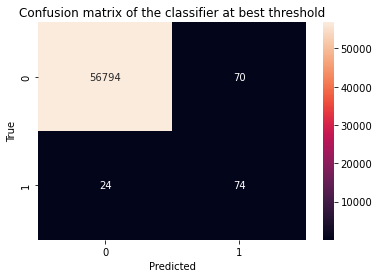

Best threshold for highest F1 score: 0.9989155822489156


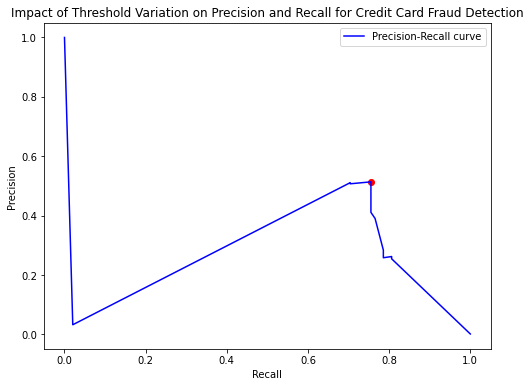

In [86]:
# Use the best model to make predictions (probability estimates)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Compute F1 scores for each threshold
f1_scores = 2*precisions*recalls / (precisions+recalls)

# Locate the index of the largest F1 score
best_index = np.argmax(f1_scores)

# Find the threshold that gives the best F1 score
best_threshold = thresholds[best_index]

# Apply the best threshold to probabilities to get binary predictions
y_pred = (y_pred_prob >= best_threshold).astype(int)

# Print a classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier at best threshold')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the best threshold
print(f"Best threshold for highest F1 score: {best_threshold}")

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, 'b-', label='Precision-Recall curve')
plt.scatter(recalls[best_index], precisions[best_index], color='red')  # add a red dot for the best threshold
plt.title('Impact of Threshold Variation on Precision and Recall for Credit Card Fraud Detection')  # updated title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

## Model 2 - Decision Tree

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9972279751161764
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.24      0.82      0.37        98

    accuracy                           1.00     56962
   macro avg       0.62      0.91      0.68     56962
weighted avg       1.00      1.00      1.00     56962



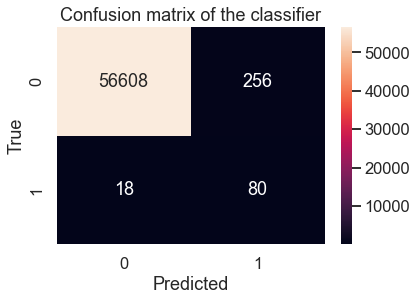

In [164]:
# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define the hyperparameters to tune
param_grid = {'max_depth': [10, 20], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5]}

# Initialize the grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)

# Fit the model with grid search
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Print the best score
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###### Model Interpretability and Identification of Predictive Factors

In [170]:
importance = best_model.feature_importances_
feature_names = data.drop('Class', axis=1).columns

# Print each feature with its corresponding importance
for i,j in enumerate(importance):
    print(f"Feature {feature_names[i]}: {j}")

Feature Time: 0.0021243569470862245
Feature V1: 0.008603778607843244
Feature V2: 0.005379019336286175
Feature V3: 0.007963402760629854
Feature V4: 0.04690774027645544
Feature V5: 0.0053497099477841925
Feature V6: 0.0007173158802965798
Feature V7: 0.004538967641771275
Feature V8: 0.008333220405534225
Feature V9: 0.0015607977775616462
Feature V10: 0.0027288050173837983
Feature V11: 0.005311312269778863
Feature V12: 0.03326052101700019
Feature V13: 0.002255762683705717
Feature V14: 0.7547189374099617
Feature V15: 0.01105241324042078
Feature V16: 0.005070401174241969
Feature V17: 0.00702746468145957
Feature V18: 0.0027284061775260603
Feature V19: 0.008619921497337875
Feature V20: 0.005330337354775444
Feature V21: 0.002134544563990558
Feature V22: 0.004043453435393699
Feature V23: 0.005770017130560026
Feature V24: 0.002322247015234708
Feature V25: 0.002896559693396219
Feature V26: 0.012111841222578025
Feature V27: 0.0027722110953347207
Feature V28: 0.0012627314709173706
Feature Amount: 0.00

#### Enhanced Credit Card Fraud Detection using Decision Trees with K-Means Feature Engineering

Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.9969795692258993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.80      0.38        98

    accuracy                           1.00     56962
   macro avg       0.62      0.90      0.69     56962
weighted avg       1.00      1.00      1.00     56962



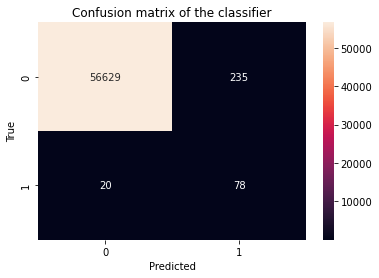

In [38]:
from sklearn.cluster import KMeans

# Create 'Hour' feature
data['Hour'] = data['Time'].apply(lambda x: np.ceil(x / 3600) % 24)

# Discretize 'Amount' feature into categories
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['Amount_Bins'] = discretizer.fit_transform(data['Amount'].values.reshape(-1,1)).astype(int)

# Drop the original 'Time' and 'Amount' features
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Apply k-means clustering and create a new feature
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(data)

# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define the hyperparameters to tune
param_grid = {'max_depth': [10, 20],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 5]}

# Initialize the grid search
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3)  # reduced cv to 3

# Fit the model with grid search
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Print the best score
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Impact of Threshold Variation on Precision and Recall for Decision Tree Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.51      0.70      0.59        98

    accuracy                           1.00     56962
   macro avg       0.75      0.85      0.79     56962
weighted avg       1.00      1.00      1.00     56962



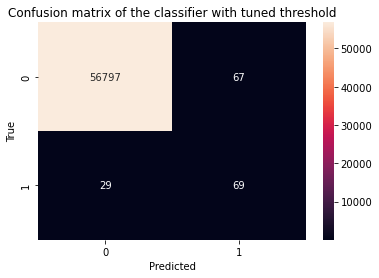

Best threshold for highest F1 score: 0.9989155822489156


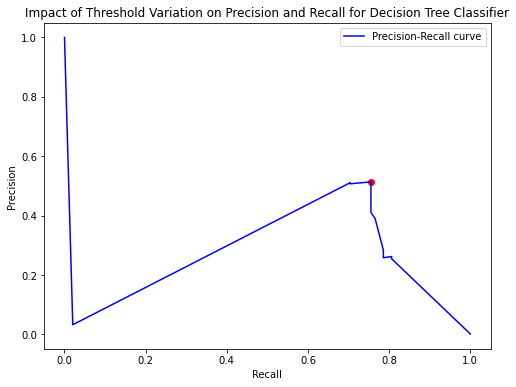

In [87]:
# Use the best model to make predictions (probability estimates)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Compute F1 scores for each threshold
f1_scores = [2*(precision*recall)/(precision+recall+1e-10) for precision, recall in zip(precisions, recalls)]

# Find the threshold that gives the highest F1 score
best_index = np.argmax(f1_scores[:-1])  # get the index of the best threshold
best_threshold = thresholds[best_index]

# Apply the best threshold to the probabilities to get binary predictions
y_pred_tuned = (y_pred_prob > best_threshold).astype(int)

# Print a classification report
print(classification_report(y_test, y_pred_tuned))

# Display confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier with tuned threshold')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the best threshold
print(f"Best threshold for highest F1 score: {best_threshold}")

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, 'b-', label='Precision-Recall curve')
plt.scatter(recalls[best_index], precisions[best_index], color='red')  # add a red dot for the best threshold
plt.title('Impact of Threshold Variation on Precision and Recall for Decision Tree Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

## Model 3 - Random Forest

Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation score: 0.9610157792227777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.27      0.89      0.41        98

    accuracy                           1.00     56962
   macro avg       0.63      0.94      0.70     56962
weighted avg       1.00      1.00      1.00     56962



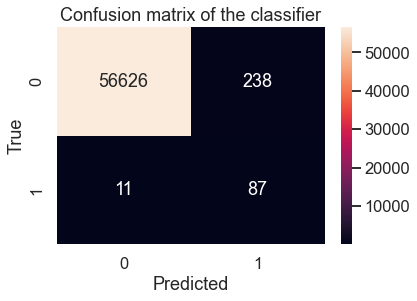

In [171]:
# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define the hyperparameters to tune
param_grid = {'n_estimators': [100],
              'max_features': ['sqrt'],
              'max_depth' : [6],
              'criterion' :['gini']}

# Initialize the grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=2)

# Fit the model with grid search
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Print the best score
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###### Model Interpretability and Identification of Predictive Factors

In [175]:
importance = best_model.feature_importances_
for i,j in enumerate(importance):
    print(f"Feature {feature_names[i]}: {j}")


Feature Time: 0.0014493217833671302
Feature V1: 0.006309426123822452
Feature V2: 0.021329373889928643
Feature V3: 0.035819033714181825
Feature V4: 0.11439752466554619
Feature V5: 0.007788153696365139
Feature V6: 0.0019828796201810397
Feature V7: 0.040907800978619235
Feature V8: 0.0068237500554005435
Feature V9: 0.018103652284721945
Feature V10: 0.12747701949803103
Feature V11: 0.06616114036265885
Feature V12: 0.15255043374329946
Feature V13: 0.0013317537605710475
Feature V14: 0.18818343103804147
Feature V15: 0.0014442997771474061
Feature V16: 0.05548400001937722
Feature V17: 0.09395627812226555
Feature V18: 0.01097835822956691
Feature V19: 0.006866428035748596
Feature V20: 0.002639312855853436
Feature V21: 0.007042313481579949
Feature V22: 0.000804480143474684
Feature V23: 0.000991349560571935
Feature V24: 0.0007599002457839358
Feature V25: 0.0004756888127814821
Feature V26: 0.002136667430776633
Feature V27: 0.004487158396987707
Feature V28: 0.0054943537805782995
Feature Amount: 0.0056

#### Credit Card Fraud Detection with Random Forests and Gaussian Mixture Feature Engineering

Best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 100}
Best cross-validation score: 0.9597122017489481
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.89      0.38        98

    accuracy                           1.00     56962
   macro avg       0.62      0.94      0.69     56962
weighted avg       1.00      1.00      1.00     56962



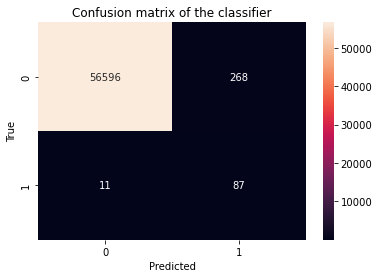

In [54]:
data = pd.read_csv("creditcard.csv")

# Create 'Hour' feature
data['Hour'] = data['Time'].apply(lambda x: np.ceil(x / 3600) % 24)

# Apply Gaussian Mixture Model to 'Amount'
gmm = GaussianMixture(n_components=3)
data['Amount_GMM'] = gmm.fit_predict(data['Amount'].values.reshape(-1,1))

# Drop the original 'Time' and 'Amount' features
data = data.drop(['Time', 'Amount'], axis=1)

# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define the hyperparameters to tune
param_grid = {'n_estimators': [100],
              'max_features': ['sqrt'],
              'max_depth' : [6],
              'criterion' :['gini']}

# Initialize the grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=2)

# Fit the model with grid search
grid_search.fit(X_train_res, y_train_res)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Print the best score
print(f"Best cross-validation score: {grid_search.best_score_}")

# Use the best model to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Impact of Threshold Variation on Precision and Recall for Random Forest Classifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.51      0.70      0.59        98

    accuracy                           1.00     56962
   macro avg       0.75      0.85      0.79     56962
weighted avg       1.00      1.00      1.00     56962



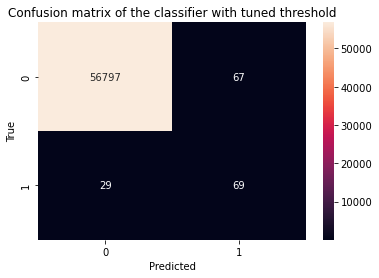

Best threshold for highest F1 score: 0.9989155822489156


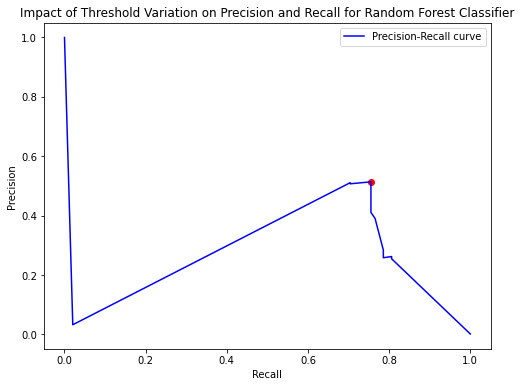

In [88]:
# Use the best model to make predictions (probability estimates)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Compute F1 scores for different thresholds
f1_scores = [2*(precision*recall)/(precision+recall+1e-10) for precision, recall in zip(precisions, recalls)]

# Find the threshold that gives the highest F1 score
best_index = np.argmax(f1_scores[:-1])  # get the index of the best threshold
best_threshold = thresholds[best_index]

# Apply the best threshold to the probabilities to get binary predictions
y_pred_tuned = (y_pred_prob > best_threshold).astype(int)

# Print a classification report
print(classification_report(y_test, y_pred_tuned))

# Display confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier with tuned threshold')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the best threshold
print(f"Best threshold for highest F1 score: {best_threshold}")

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, 'b-', label='Precision-Recall curve')
plt.scatter(recalls[best_index], precisions[best_index], color='red')  # add a red dot for the best threshold
plt.title('Impact of Threshold Variation on Precision and Recall for Random Forest Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

## Model 4 - Support Vector Machine

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.90      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



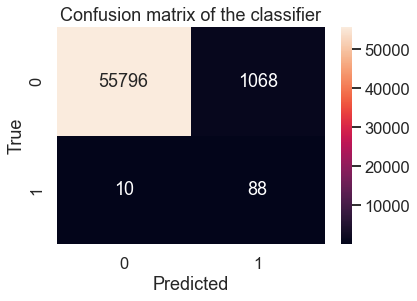

In [176]:
# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define and fit the model
clf = LinearSVC(C=1, dual=False, random_state=42) # Set dual to False
clf.fit(X_train_res, y_train_res)

# Make predictions
y_pred = clf.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

###### Model Interpretability and Identification of Predictive Factors

In [177]:
importance = clf.coef_[0]
feature_names = data.drop('Class', axis=1).columns

for i, importance in enumerate(importance):
    print(f"Feature {feature_names[i]}: {importance}")

Feature Time: -0.19978830733033456
Feature V1: 0.11830545849215958
Feature V2: -0.048116908217936835
Feature V3: -0.09383064663778312
Feature V4: 0.3246765584679043
Feature V5: 0.0907163544873881
Feature V6: -0.07458329749513742
Feature V7: 0.040399638517996835
Feature V8: -0.12451806931682212
Feature V9: -0.09802959797167732
Feature V10: -0.1957619049771081
Feature V11: 0.04719392777232233
Feature V12: -0.1920671540289063
Feature V13: -0.028735853840299513
Feature V14: -0.2517532661076215
Feature V15: -0.03860671403332772
Feature V16: -0.049882903564403266
Feature V17: -0.008371756305661504
Feature V18: 0.007175587034222773
Feature V19: -0.0001084048856795734
Feature V20: -0.05019752833836421
Feature V21: 0.045576113812597414
Feature V22: 0.08597771985265974
Feature V23: -0.017246934134644825
Feature V24: -0.03463773083709106
Feature V25: -0.032990575619077075
Feature V26: -0.07414341179297222
Feature V27: 0.007710026803827784
Feature V28: 0.021945658367319237
Feature Amount: 0.026346

#### Credit Card Fraud Detection with Linear SVC and Principal Component Interaction Feature Engineering

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



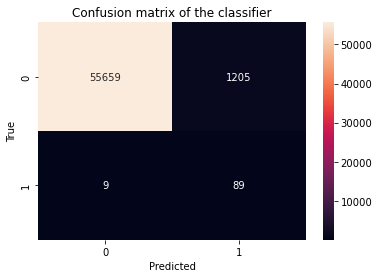

In [59]:
data = pd.read_csv("creditcard.csv")
# Create 'Hour' feature
data['Hour'] = data['Time'].apply(lambda x: np.ceil(x / 3600) % 24)

# Discretize 'Amount' feature into categories
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
data['Amount_Bins'] = discretizer.fit_transform(data['Amount'].values.reshape(-1,1)).astype(int)

# Create feature interaction
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
data_interaction = poly.fit_transform(data[['V2', 'V3']])
data['V2_V3_interaction'] = data_interaction[:, -1]

# Drop the original 'Time' and 'Amount' features
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define and fit the model
clf = svm.LinearSVC(dual=False) # Using LinearSVC
clf.fit(X_train_res, y_train_res)

# Make predictions
y_pred = clf.predict(X_test)

# Print a classification report
print(classification_report(y_test, y_pred))

# Display confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Optimal Threshold Tuning and Evaluation Using Precision-Recall Curve and F1 Score for Classifier Predictions

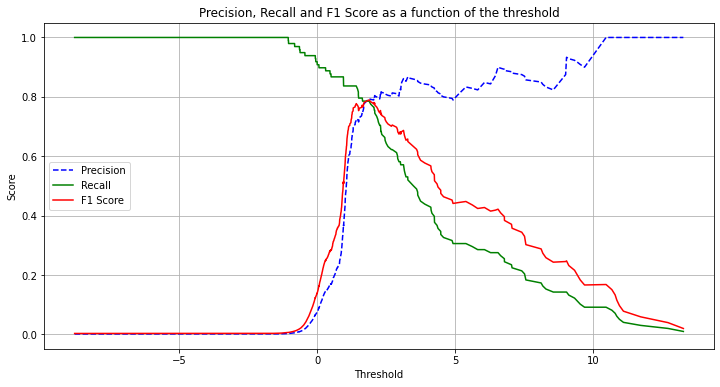

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.79      0.78      0.78        98

    accuracy                           1.00     56962
   macro avg       0.90      0.89      0.89     56962
weighted avg       1.00      1.00      1.00     56962



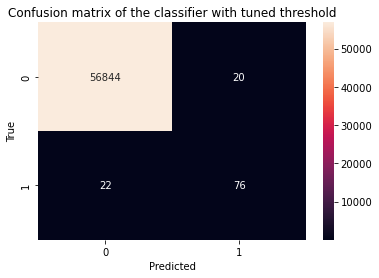

In [76]:
# Plot Precision-Recall curve
plt.figure(figsize=(12, 6))
plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
plt.plot(thresholds, f1_scores[:-1], 'r-', label='F1 Score')
plt.ylabel('Score')
plt.xlabel('Threshold')
plt.legend(loc='center left')
plt.title('Precision, Recall and F1 Score as a function of the threshold')
plt.grid(True)
plt.show()

# Use the best model to make predictions (distance from separating hyperplane)
y_scores = clf.decision_function(X_test)

# Apply the best threshold to the scores to get binary predictions
y_pred_tuned = (y_scores > best_threshold).astype(int)

# Print a classification report
print(classification_report(y_test, y_pred_tuned))

# Display confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier with tuned threshold')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Model 5 - 1D Convolutional Neural Network

In [51]:
# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Reshape the input data into [samples, time steps, features]
X_train_res_reshaped = X_train_res.values.reshape((X_train_res.shape[0], X_train_res.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_res_reshaped.shape[1], 1)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid function for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.01), 
              metrics=['accuracy'])

# Train the model
model.fit(X_train_res_reshaped, y_train_res, validation_data=(X_test_reshaped, y_test), epochs=10, batch_size=32)

# Predict classes using the testing data
y_pred = model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5).astype(int)  # convert probabilities to binary outputs

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))


Epoch 1/10
14216/14216 [==============================] - 12s 819us/step - loss: 1.4387 - accuracy: 0.9791 - val_loss: 0.0373 - val_accuracy: 0.9873
Epoch 2/10
14216/14216 [==============================] - 12s 825us/step - loss: 0.0612 - accuracy: 0.9869 - val_loss: 0.0139 - val_accuracy: 0.9967
Epoch 3/10
14216/14216 [==============================] - 12s 826us/step - loss: 0.0364 - accuracy: 0.9892 - val_loss: 0.0360 - val_accuracy: 0.9882
Epoch 4/10
14216/14216 [==============================] - 12s 845us/step - loss: 0.0589 - accuracy: 0.9902 - val_loss: 0.0139 - val_accuracy: 0.9963
Epoch 5/10
14216/14216 [==============================] - 12s 829us/step - loss: 0.0313 - accuracy: 0.9911 - val_loss: 0.0145 - val_accuracy: 0.9963
Epoch 6/10
14216/14216 [==============================] - 12s 873us/step - loss: 0.0346 - accuracy: 0.9914 - val_loss: 0.0320 - val_accuracy: 0.9899
Epoch 7/10
14216/14216 [==============================] - 12s 821us/step - loss: 0.0476 - accuracy: 0.9918

###### Model Interpretability and Identification of Predictive Factors

In [63]:
# Select a representative subset
subset_size = 500 
subset_indices = np.random.choice(X_test.shape[0], size=subset_size, replace=False)

X_test_subset = X_test.iloc[subset_indices]

# Wrap the model
def f(x):
    return model.predict(x.reshape(-1, X_train_res_reshaped.shape[1], 1))

shap.initjs()

background_dataset = shap.kmeans(X_train_res.values, 5)  # reduce the number of clusters

# Create an explainer object with the wrapped model and the background dataset
explainer = shap.KernelExplainer(f, background_dataset)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_subset.values)

# Print the base value (expected value)
print("Base Value: ", explainer.expected_value[0])

# Print the SHAP values for the first instance
print("SHAP Values: ", shap_values[0][0])

# Print the features for the first instance
print("Feature Values: ", X_test_subset.iloc[0].values)

# Visualize the first prediction's explanation for instance
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X_test_subset.iloc[0])

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


1/1 [==============================] - 0s 14ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

330/330 [==============================] - 0s 455us/step
Base Value:  0.9974009394645691
SHAP Values:  [-0.0117013   0.02509146  0.01809646 -0.01520523 -0.03178018  0.02618427
 -0.00604498 -0.14818685 -0.0128     -0.01978017 -0.05817065 -0.1892569
 -0.13113109 -0.0057409  -0.09754763  0.01165741 -0.06561471 -0.22600268
  0.01092854  0.01734089  0.          0.00891473 -0.01119862 -0.01035632
 -0.00561607 -0.03836518 -0.00510015 -0.01245581 -0.01045755 -0.00310175]
Feature Values:  [ 6.80070000e+04 -3.12469386e-01 -1.39189262e-01  1.84341954e+00
 -4.32552304e-01 -6.56445119e-01  3.76231345e-01  1.56223239e-02
  2.08325422e-01  1.30809521e+00 -1.13324009e+00 -1.89290359e+00
  9.69007877e-01  8.58846541e-01 -1.42243173e+00 -2.51264777e+00
 -2.71013362e-01 -4.79453608e-02 -5.86535685e-01  2.13498592e-01
  3.35310899e-02 -2.96615778e-02  2.97995360e-01  2.04664539e-01
 -6.16741014e-03 -1.11990236e+00  6.97834129e-01  1.93757219e-01
  2.33090119e-01  7.08500000e+01]


#### Conv1D Neural Network for Credit Card Fraud Detection with Logarithmic Amount and Hour Interaction Feature

In [62]:
data = pd.read_csv("creditcard.csv")

# Create new features
data['hour'] = data['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)
data['log_amount'] = data['Amount'].apply(lambda x: np.log(x + 0.01))

# Create feature interaction
data['hour_log_amount'] = data['hour'] * data['log_amount']

# Drop the original 'Time' and 'Amount' features
data = data.drop(['Time', 'Amount'], axis=1)

# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Reshape the input data into [samples, time steps, features]
X_train_res_reshaped = X_train_res.values.reshape((X_train_res.shape[0], X_train_res.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train_res_reshaped.shape[1], 1)))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid function for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(learning_rate=0.01), 
              metrics=['accuracy'])

# Train the model
model.fit(X_train_res_reshaped, y_train_res, validation_data=(X_test_reshaped, y_test), epochs=10, batch_size=32)

# Predict classes using the testing data
y_pred = model.predict(X_test_reshaped)
y_pred = (y_pred > 0.5).astype(int)  # convert probabilities to binary outputs

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
14216/14216 [==============================] - 12s 842us/step - loss: 0.0426 - accuracy: 0.9851 - val_loss: 0.0271 - val_accuracy: 0.9892
Epoch 2/10
14216/14216 [==============================] - 12s 870us/step - loss: 0.0253 - accuracy: 0.9924 - val_loss: 0.0291 - val_accuracy: 0.9909
Epoch 3/10
14216/14216 [==============================] - 12s 849us/step - loss: 0.0217 - accuracy: 0.9939 - val_loss: 0.0277 - val_accuracy: 0.9938
Epoch 4/10
14216/14216 [==============================] - 14s 983us/step - loss: 0.0191 - accuracy: 0.9948 - val_loss: 0.0438 - val_accuracy: 0.9917
Epoch 5/10
14216/14216 [==============================] - 13s 905us/step - loss: 0.0184 - accuracy: 0.9953 - val_loss: 0.0338 - val_accuracy: 0.9946
Epoch 6/10
14216/14216 [==============================] - 12s 825us/step - loss: 0.0184 - accuracy: 0.9954 - val_loss: 0.0336 - val_accuracy: 0.9952
Epoch 7/10
14216/14216 [==============================] - 12s 839us/step - loss: 0.0174 - accuracy: 0.9957

#### Threshold Tuning and Model Evaluation with Precision-Recall Curve

1781/1781 [==============================] - 1s 488us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.78      0.67      0.72        98

    accuracy                           1.00     56962
   macro avg       0.89      0.84      0.86     56962
weighted avg       1.00      1.00      1.00     56962



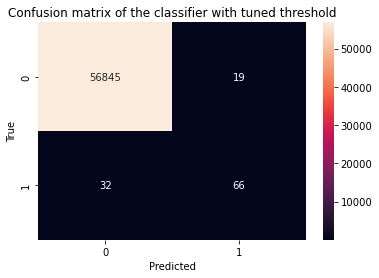

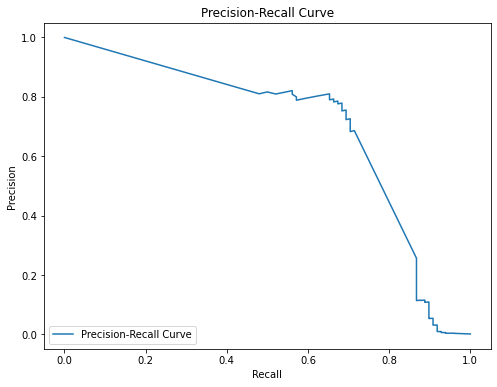

In [70]:
# Use the model to predict probabilities
y_scores = model.predict(X_test_reshaped)

# Compute precision, recall, and thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Compute F1 score for different thresholds
f1_scores = [2*(precision*recall)/(precision+recall+1e-10) for precision, recall in zip(precisions, recalls)]

# Find the threshold that gives the highest F1 score
best_threshold = thresholds[np.argmax(f1_scores[:-1])]

# Apply the best threshold to the scores to get binary predictions
y_pred_tuned = (y_scores > best_threshold).astype(int)

# Print a classification report
print(classification_report(y_test, y_pred_tuned))

# Display confusion matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt="d")
plt.title('Confusion matrix of the classifier with tuned threshold')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

## Model 6 - Autoencoder Neural Network

In [25]:
# Load the data
data = pd.read_csv('creditcard.csv')

# Split the data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 14  # Adjust as needed

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dropout(0.5)(encoder)  # Add dropout layer for regularization
decoder = Dense(input_dim, activation='relu')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Use the autoencoder to reconstruct the test set
X_test_reconstructed = autoencoder.predict(X_test)

# Obtain the reconstruction error
mse = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)

# Convert the reconstruction error to a pandas series
mse = pd.Series(mse)

# Compute precision and recall for a range of thresholds
precisions, recalls, thresholds = [], [], []
for threshold in np.linspace(mse.min(), mse.max(), 100):
    y_pred = mse > threshold
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    thresholds.append(threshold)

# Find the threshold that gives the best F1 score
f1_scores = [2*(precision*recall)/(precision+recall+1e-10) for precision, recall in zip(precisions, recalls)]
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply the best threshold to the reconstruction error to obtain binary predictions
y_pred = mse > best_threshold

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
7121/7121 [==============================] - 5s 654us/step - loss: 0.8544 - val_loss: 0.7513
Epoch 2/10
7121/7121 [==============================] - 4s 565us/step - loss: 0.8174 - val_loss: 0.7393
Epoch 3/10
7121/7121 [==============================] - 4s 568us/step - loss: 0.8123 - val_loss: 0.7357
Epoch 4/10
7121/7121 [==============================] - 4s 573us/step - loss: 0.8084 - val_loss: 0.7355
Epoch 5/10
7121/7121 [==============================] - 4s 565us/step - loss: 0.8070 - val_loss: 0.7313
Epoch 6/10
7121/7121 [==============================] - 4s 567us/step - loss: 0.8060 - val_loss: 0.7316
Epoch 7/10
7121/7121 [==============================] - 4s 561us/step - loss: 0.8050 - val_loss: 0.7315
Epoch 8/10
7121/7121 [==============================] - 4s 567us/step - loss: 0.8040 - val_loss: 0.7321
Epoch 9/10
7121/7121 [==============================] - 4s 574us/step - loss: 0.8026 - val_loss: 0.7343
Epoch 10/10
1781/1781 [==============================] - 1s 334u

###### Model Interpretability and Identification of Predictive Factors

In [81]:
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

# Define the encoder part of the autoencoder as a separate model
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-2].output)

# Wrap the model with a function for SHAP
def f(x):
    return encoder_model.predict(x)

# Select a representative subset
subset_size = 500  
subset_indices = np.random.choice(X_test_df.shape[0], size=subset_size, replace=False)

X_test_subset = X_test_df.iloc[subset_indices]

# Create a background dataset 
background_dataset = shap.kmeans(X_test_df, 5)  # reduce the number of clusters

# Create an explainer object with the wrapped model and the background dataset
explainer = shap.KernelExplainer(f, background_dataset)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_subset)

# Print the base value (expected value)
print("Base Value: ", explainer.expected_value[0])

# Print the SHAP values for the first instance
print("SHAP Values: ", shap_values[0][0])

# Print the features for the first instance
print("Feature Values: ", X_test_subset.iloc[0])


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


1/1 [==============================] - 0s 176ms/step


  0%|          | 0/500 [00:00<?, ?it/s]

330/330 [==============================] - 0s 431us/step
Base Value:  0.0
SHAP Values:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Feature Values:  Time      38639.000000
V1            1.295127
V2           -0.866599
V3            0.858257
V4           -0.727787
V5           -1.497267
V6           -0.230996
V7           -1.135269
V8            0.191424
V9           -0.473166
V10           0.842291
V11           0.620633
V12          -0.384473
V13          -1.133298
V14           0.288697
V15           0.797639
V16          -0.444345
V17          -0.526894
V18           2.024120
V19          -0.547227
V20          -0.496086
V21          -0.363085
V22          -0.724484
V23           0.117406
V24          -0.016908
V25          -0.123434
V26           0.934900
V27          -0.040220
V28           0.009626
Amount       26.970000
Name: 36674, dtype: float64


#### Fraud Detection Using Deep Autoencoder and Time-Series Based Feature Engineering

In [26]:
# Load the data
data = pd.read_csv('creditcard.csv')  
# Feature Engineering
data['Time_Diff'] = data['Time'].diff().fillna(0)
data['Transactions_So_Far'] = range(1, len(data) + 1)
data['Amount_Per_Transaction'] = data['Amount'] / data['Transactions_So_Far']

# Split the data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 14 

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
encoder = Dropout(0.5)(encoder)  
decoder = Dense(input_dim, activation='relu')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Use the autoencoder to reconstruct the test set
X_test_reconstructed = autoencoder.predict(X_test)

# Obtain the reconstruction error
mse = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)

# Convert the reconstruction error to a pandas series
mse = pd.Series(mse)

# Compute precision and recall for a range of thresholds
precisions, recalls, thresholds = [], [], []
for threshold in np.linspace(mse.min(), mse.max(), 100):
    y_pred = mse > threshold
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    thresholds.append(threshold)

# Find the threshold that gives the best F1 score
f1_scores = [2*(precision*recall)/(precision+recall+1e-10) for precision, recall in zip(precisions, recalls)]
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply the best threshold to the reconstruction error to obtain binary predictions
y_pred = mse > best_threshold

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Epoch 1/10
7121/7121 [==============================] - 4s 574us/step - loss: 0.8353 - val_loss: 0.8067
Epoch 2/10
7121/7121 [==============================] - 4s 584us/step - loss: 0.8010 - val_loss: 0.7964
Epoch 3/10
7121/7121 [==============================] - 4s 578us/step - loss: 0.7955 - val_loss: 0.7940
Epoch 4/10
7121/7121 [==============================] - 4s 568us/step - loss: 0.7944 - val_loss: 0.7903
Epoch 5/10
7121/7121 [==============================] - 4s 568us/step - loss: 0.7929 - val_loss: 0.7864
Epoch 6/10
7121/7121 [==============================] - 4s 584us/step - loss: 0.7927 - val_loss: 0.7865
Epoch 7/10
7121/7121 [==============================] - 4s 617us/step - loss: 0.7910 - val_loss: 0.7844
Epoch 8/10
7121/7121 [==============================] - 4s 569us/step - loss: 0.7901 - val_loss: 0.7862
Epoch 9/10
7121/7121 [==============================] - 4s 566us/step - loss: 0.7892 - val_loss: 0.7850
Epoch 10/10
1781/1781 [==============================] - 1s 334u

#### Optimal Threshold Determination for Anomaly Detection Using Autoencoder Reconstruction Error

Epoch 1/10
7121/7121 [==============================] - 5s 641us/step - loss: 374351232.0000 - val_loss: 374682144.0000
Epoch 2/10
7121/7121 [==============================] - 4s 569us/step - loss: 373679360.0000 - val_loss: 374009920.0000
Epoch 3/10
7121/7121 [==============================] - 4s 589us/step - loss: 373007776.0000 - val_loss: 373339136.0000
Epoch 4/10
7121/7121 [==============================] - 4s 571us/step - loss: 372415104.0000 - val_loss: 373007264.0000
Epoch 5/10
7121/7121 [==============================] - 4s 579us/step - loss: 372008192.0000 - val_loss: 372337952.0000
Epoch 6/10
7121/7121 [==============================] - 4s 575us/step - loss: 371339424.0000 - val_loss: 371668640.0000
Epoch 7/10
7121/7121 [==============================] - 4s 598us/step - loss: 370670720.0000 - val_loss: 371000224.0000
Epoch 8/10
7121/7121 [==============================] - 4s 584us/step - loss: 371026624.0000 - val_loss: 371619968.0000
Epoch 9/10
7121/7121 [==================

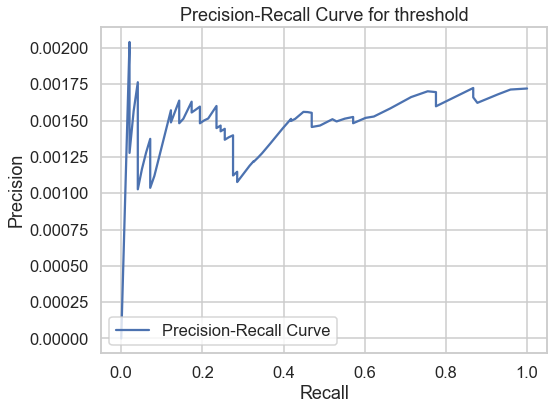

In [215]:
# Load the data
data = pd.read_csv('creditcard.csv')  
# Split the data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 14  

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh")(input_layer)
decoder = Dense(input_dim, activation='relu')(encoder)

autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test, X_test))

# Use the autoencoder to reconstruct the test set
X_test_reconstructed = autoencoder.predict(X_test)

# Obtain the reconstruction error
mse = np.mean(np.power(X_test - X_test_reconstructed, 2), axis=1)

# Convert the reconstruction error to a pandas series
mse = pd.Series(mse)

# Compute precision and recall for a range of thresholds
precisions, recalls, thresholds = [], [], []
for threshold in np.linspace(mse.min(), mse.max(), 100):
    y_pred = mse > threshold
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    thresholds.append(threshold)

# Find the threshold that gives the best F1 score
f1_scores = [2*(precision*recall)/(precision+recall+1e-10) for precision, recall in zip(precisions, recalls)]
best_threshold = thresholds[np.argmax(f1_scores)]

# Apply the best threshold to the reconstruction error to obtain binary predictions
y_pred = mse > best_threshold

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for threshold')
plt.legend(loc="lower left")
plt.show()

## Model - 7 Gradient Boosting Classifier

In [79]:
# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define the model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train_res, y_train_res)

# Predict classes using the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56539   325]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.90      0.34        98

    accuracy                           0.99     56962
   macro avg       0.61      0.95      0.67     56962
weighted avg       1.00      0.99      1.00     56962



###### Model Interpretability and Identification of Predictive Factors

In [80]:
# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Use SHAP to explain the model's predictions
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# Summarize the effect of all the features over all the samples
global_shap_vals = np.abs(shap_values).mean(axis=0)

# Get the names of the features
feature_names = data.columns.tolist()

# Sort the global importance values and their corresponding feature names
indices = np.argsort(global_shap_vals)[::-1]
feature_names = [feature_names[i] for i in indices]
global_shap_vals = global_shap_vals[indices]

# Display the global feature importance
for name, val in zip(feature_names, global_shap_vals):
    print(name, val)


V14 2.0910738688486075
V4 1.3908104879773315
V12 0.769187783210998
V10 0.3292161513551754
V11 0.2801972964740761
V1 0.24883212403523144
V3 0.24530516274347353
V17 0.18183502567943227
V16 0.17547698552311772
V8 0.1496070303628981
Time 0.12602649477878883
V7 0.121445001220132
V9 0.09755974904747751
V18 0.09594979844956911
V19 0.06524514673820263
V6 0.06516397481542718
Amount 0.06397145550309219
V15 0.0593840619335348
V26 0.058171099517855804
V25 0.04063750588905222
V2 0.03236250839352238
V5 0.030160469453022965
V20 0.022484943807199197
V22 0.021148060773263054
V24 0.020952976801339958
V23 0.012364405880478933
V28 0.008627506404204587
V13 0.007198954611558993
V27 0.004275767090010411
V21 0.0018917601164421226


#### Credit Card Fraud Detection with Enhanced Feature Engineering and Gradient Boosting Classifier

In [12]:
# Split the features and the target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Feature Engineering
X['Time_Diff'] = X['Time'].diff().fillna(0)
X['Transactions_So_Far'] = range(1, len(X) + 1)
X['Amount_Per_Transaction'] = X['Amount'] / X['Transactions_So_Far']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Define the model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train_res, y_train_res)

# Predict classes using the testing data
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56630   234]
 [   10    88]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.27      0.90      0.42        98

    accuracy                           1.00     56962
   macro avg       0.64      0.95      0.71     56962
weighted avg       1.00      1.00      1.00     56962



#### Optimal Threshold Determination for Gradient Boosting Classifier in Credit Card Fraud Detection

[[56848    16]
 [   16    82]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.84      0.84        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



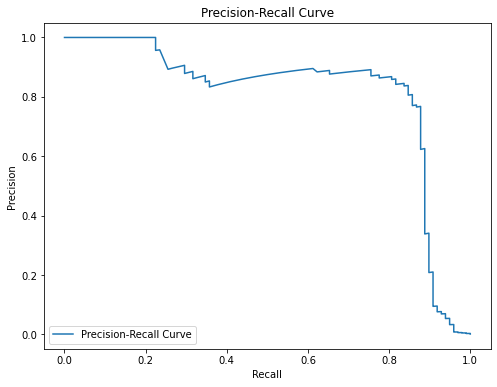

In [15]:
# Define the model
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train_res, y_train_res)

# Obtain prediction probabilities from the Gradient Boosting Classifier
y_scores = model.predict_proba(X_test)[:, 1]

# Compute precision and recall for a range of thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Compute F1 scores for the different thresholds
f1_scores = [2*(precision*recall)/(precision+recall+1e-10) for precision, recall in zip(precisions, recalls)]

# Find the threshold that gives the best F1 score
best_threshold = thresholds[np.argmax(f1_scores[:-1])]

# Apply the best threshold to the prediction probabilities to obtain binary predictions
y_pred = (y_scores > best_threshold).astype(int)

# Print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

#### Comparison of Basic and Enhanced Logistic Regression Model

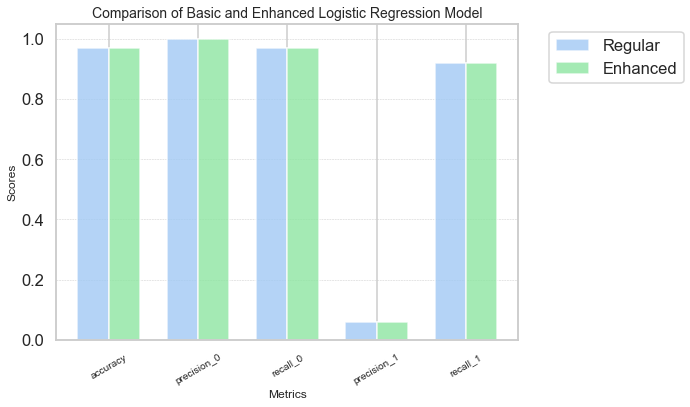

In [207]:
# Metrics for the regular and enhanced Logistic Regression
regular_metrics = {"accuracy": 0.97, "precision_0": 1.00, "recall_0": 0.97, "precision_1": 0.06, "recall_1": 0.92}
enhanced_metrics = {"accuracy": 0.97, "precision_0": 1.00, "recall_0": 0.97, "precision_1": 0.06, "recall_1": 0.92}

# Position of each bar on the x axis
bar_pos = np.arange(len(regular_metrics))

fig, ax = plt.subplots(figsize=(10, 6)) 

bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(bar_pos, list(regular_metrics.values()), bar_width,
alpha=opacity,
color='b',
label='Regular')

rects2 = plt.bar(bar_pos + bar_width, list(enhanced_metrics.values()), bar_width,
alpha=opacity,
color='g',
label='Enhanced')

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Basic and Enhanced Logistic Regression Model', fontsize=14)
plt.xticks(bar_pos + bar_width / 2, list(regular_metrics.keys()), rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)  # Add gridlines

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 

plt.tight_layout()
plt.show()

#### Comparison of Basic and Enhanced Decision Tree Model

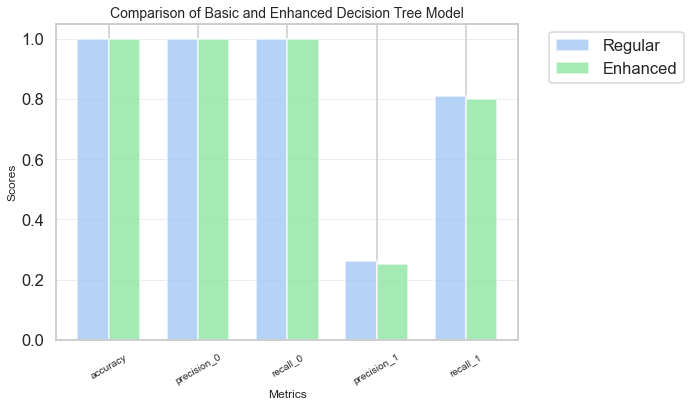

In [208]:
# Metrics for the regular and enhanced Decision Tree
regular_metrics = {"accuracy": 1.00, "precision_0": 1.00, "recall_0": 1.00, "precision_1": 0.26, "recall_1": 0.81}
enhanced_metrics = {"accuracy": 1.00, "precision_0": 1.00, "recall_0": 1.00, "precision_1": 0.25, "recall_1": 0.80}

bar_pos = np.arange(len(regular_metrics))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(bar_pos, list(regular_metrics.values()), bar_width, alpha=opacity, color='b', label='Regular')
rects2 = plt.bar(bar_pos + bar_width, list(enhanced_metrics.values()), bar_width, alpha=opacity, color='g', label='Enhanced')

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Basic and Enhanced Decision Tree Model', fontsize=14)
plt.xticks(bar_pos + bar_width / 2, list(regular_metrics.keys()), rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Comparison of Basic and Enhanced Random Forest Model

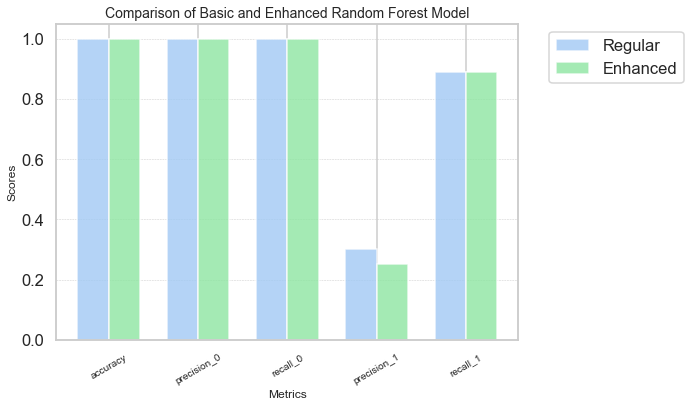

In [209]:
# Metrics for the regular and enhanced Random Forest
regular_metrics = {"accuracy": 1.00, "precision_0": 1.00, "recall_0": 1.00, "precision_1": 0.30, "recall_1": 0.89}
enhanced_metrics = {"accuracy": 1.00, "precision_0": 1.00, "recall_0": 1.00, "precision_1": 0.25, "recall_1": 0.89}

bar_pos = np.arange(len(regular_metrics))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(bar_pos, list(regular_metrics.values()), bar_width, alpha=opacity, color='b', label='Regular')
rects2 = plt.bar(bar_pos + bar_width, list(enhanced_metrics.values()), bar_width, alpha=opacity, color='g', label='Enhanced')

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Basic and Enhanced Random Forest Model', fontsize=14)
plt.xticks(bar_pos + bar_width / 2, list(regular_metrics.keys()), rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Comparison of Basic and Enhanced SVM Model

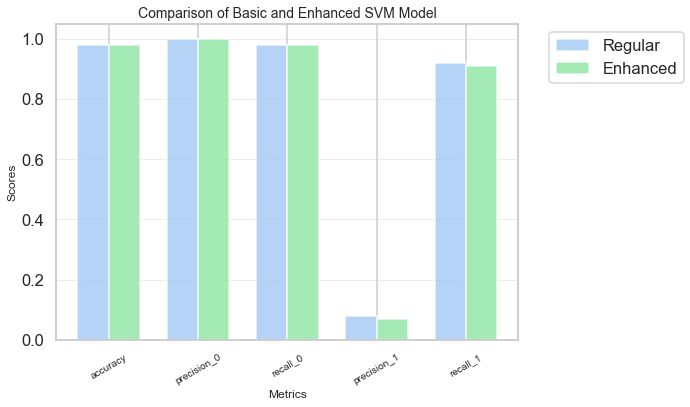

In [210]:
# Metrics for the regular and enhanced SVM
regular_metrics = {"accuracy": 0.98, "precision_0": 1.00, "recall_0": 0.98, "precision_1": 0.08, "recall_1": 0.92}
enhanced_metrics = {"accuracy": 0.98, "precision_0": 1.00, "recall_0": 0.98, "precision_1": 0.07, "recall_1": 0.91}

bar_pos = np.arange(len(regular_metrics))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(bar_pos, list(regular_metrics.values()), bar_width, alpha=opacity, color='b', label='Regular')
rects2 = plt.bar(bar_pos + bar_width, list(enhanced_metrics.values()), bar_width, alpha=opacity, color='g', label='Enhanced')

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Basic and Enhanced SVM Model', fontsize=14)
plt.xticks(bar_pos + bar_width / 2, list(regular_metrics.keys()), rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#### Comparison of Basic and Enhanced 1D Convolutional Neural Network Model

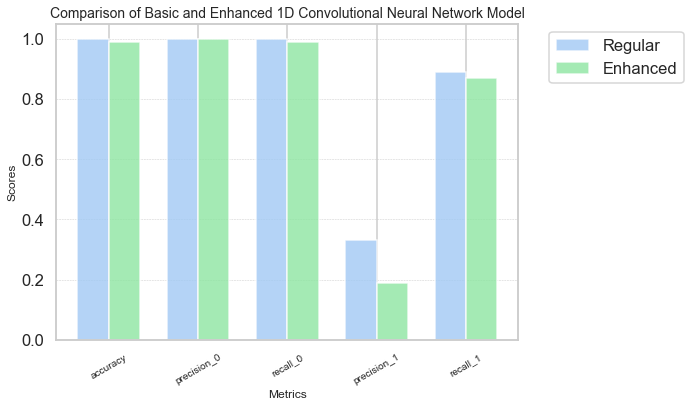

In [211]:
# Metrics for the regular and enhanced Convolutional Neural Network
regular_metrics = {"accuracy": 1.00, "precision_0": 1.00, "recall_0": 1.00, "precision_1": 0.33, "recall_1": 0.89}
enhanced_metrics = {"accuracy": 0.99, "precision_0": 1.00, "recall_0": 0.99, "precision_1": 0.19, "recall_1": 0.87}

bar_pos = np.arange(len(regular_metrics))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(bar_pos, list(regular_metrics.values()), bar_width, alpha=opacity, color='b', label='Regular')
rects2 = plt.bar(bar_pos + bar_width, list(enhanced_metrics.values()), bar_width, alpha=opacity, color='g', label='Enhanced')

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Basic and Enhanced 1D Convolutional Neural Network Model', fontsize=14)
plt.xticks(bar_pos + bar_width / 2, list(regular_metrics.keys()), rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


#### Comparison of Basic and Enhanced Autoencoder Neural Network Model

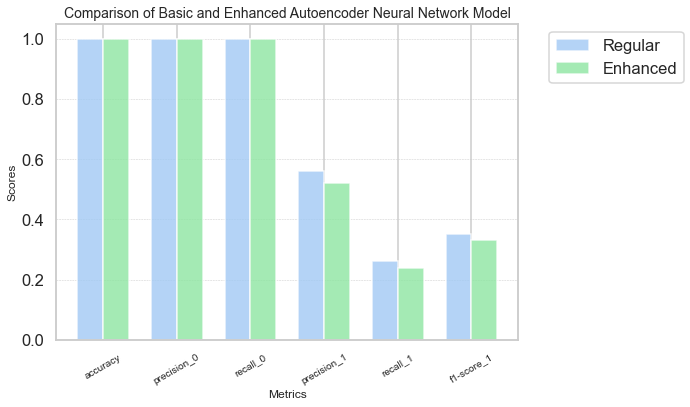

In [212]:
# Metrics for the regular and enhanced Autoencoder Neural Network
regular_metrics = {"accuracy": 1.00, "precision_0": 1.00, "recall_0": 1.00, "precision_1": 0.56, "recall_1": 0.26, "f1-score_1": 0.35}
enhanced_metrics = {"accuracy": 1.00, "precision_0": 1.00, "recall_0": 1.00, "precision_1": 0.52, "recall_1": 0.24, "f1-score_1": 0.33}

bar_pos = np.arange(len(regular_metrics))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(bar_pos, list(regular_metrics.values()), bar_width, alpha=opacity, color='b', label='Regular')
rects2 = plt.bar(bar_pos + bar_width, list(enhanced_metrics.values()), bar_width, alpha=opacity, color='g', label='Enhanced')

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Basic and Enhanced Autoencoder Neural Network Model', fontsize=14)
plt.xticks(bar_pos + bar_width / 2, list(regular_metrics.keys()), rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Comparison of Basic and Enhanced Gradient Boosting Classifier Model

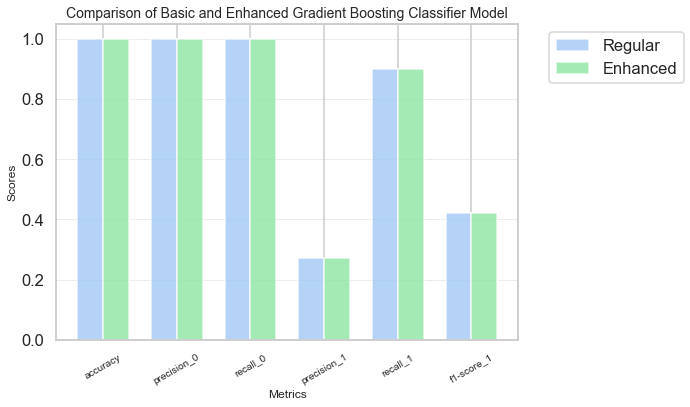

In [213]:
# Metrics for the regular and enhanced Gradient Boosting Classifier
regular_metrics = {"accuracy": 1.00, "precision_0": 1.00, "recall_0": 1.00, "precision_1": 0.27, "recall_1": 0.90, "f1-score_1": 0.42}
enhanced_metrics = {"accuracy": 1.00, "precision_0": 1.00, "recall_0": 1.00, "precision_1": 0.27, "recall_1": 0.90, "f1-score_1": 0.42}

bar_pos = np.arange(len(regular_metrics))

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(bar_pos, list(regular_metrics.values()), bar_width, alpha=opacity, color='b', label='Regular')
rects2 = plt.bar(bar_pos + bar_width, list(enhanced_metrics.values()), bar_width, alpha=opacity, color='g', label='Enhanced')

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Comparison of Basic and Enhanced Gradient Boosting Classifier Model', fontsize=14)
plt.xticks(bar_pos + bar_width / 2, list(regular_metrics.keys()), rotation=30, fontsize=10)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

#### Comparative Analysis of all the Models

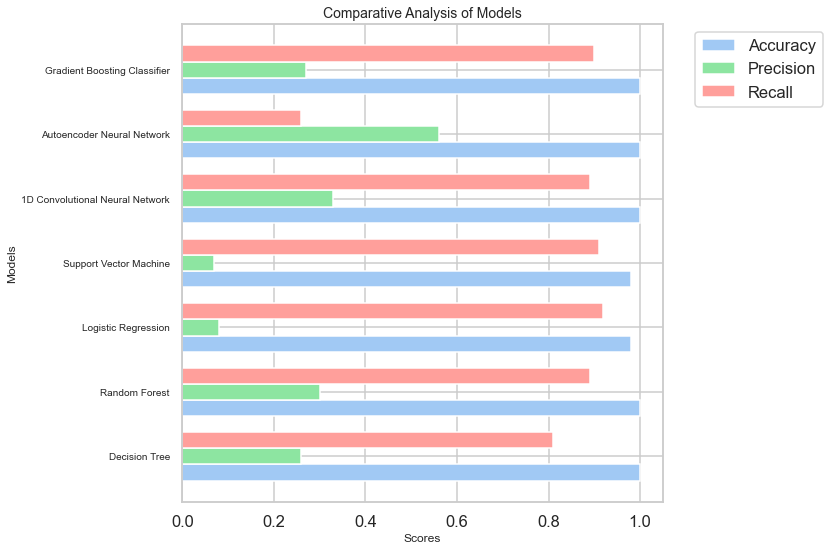

In [214]:
# Metrics for all 7 models
metrics = [
    {"model": "Decision Tree", "accuracy": 1.00, "precision": 0.26, "recall": 0.81},
    {"model": "Random Forest", "accuracy": 1.00, "precision": 0.30, "recall": 0.89},
    {"model": "Logistic Regression", "accuracy": 0.98, "precision": 0.08, "recall": 0.92},
    {"model": "Support Vector Machine", "accuracy": 0.98, "precision": 0.07, "recall": 0.91},
    {"model": "1D Convolutional Neural Network", "accuracy": 1.00, "precision": 0.33, "recall": 0.89},
    {"model": "Autoencoder Neural Network", "accuracy": 1.00, "precision": 0.56, "recall": 0.26},
    {"model": "Gradient Boosting Classifier", "accuracy": 1.00, "precision": 0.27, "recall": 0.90}
]

bar_pos = np.arange(len(metrics))
bar_width = 0.25

fig, ax = plt.subplots(figsize=(12, 8))

rects1 = plt.barh(bar_pos - bar_width, [m['accuracy'] for m in metrics], bar_width, color='b', label='Accuracy')
rects2 = plt.barh(bar_pos, [m['precision'] for m in metrics], bar_width, color='g', label='Precision')
rects3 = plt.barh(bar_pos + bar_width, [m['recall'] for m in metrics], bar_width, color='r', label='Recall')

plt.yticks(bar_pos, [m['model'] for m in metrics], fontsize=10)
plt.ylabel('Models', fontsize=12)
plt.xlabel('Scores', fontsize=12)
plt.title('Comparative Analysis of Models', fontsize=14)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()